In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Elon_musk.csv',encoding='latin1')

In [3]:
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
df =data.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [6]:
##  cleaning the text by removing irrelevant information (at least for our purposes) like hashtags, mentions, retweets and links.

In [27]:
import re

# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"\[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    text = re.sub(r";","",text) ## Remove &amp
    text = re.sub(r":","",text) ## Remove &amp
    text = re.sub(r"<U+0001F923><U+0001F923>","",text) ## Remove &amp
    

    
    return text


In [28]:
# Clean The Text
df["Text"] = df["Text"].apply(cleantext)


In [29]:
df.head()

,Text
0,Im alien
1,_AA_Carmack Ray tracing Cyberpunk HDR next-lev...
2,Great interview!
3,Doge underestimated
4,Congratulations Tesla China amazing execution ...


In [30]:
#Word frequency
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq

I                           115
Tesla                        85
The                          80
This                         61
We                           58
Yes                          50
launch                       38
Its                         38
like                         38
would                        37
It                           36
great                        36
<U+0001F923><U+0001F923>     34
make                         31
_AA_Carmack                  31
_feed                        30
need                         30
Dragon                       29
Great                        29
first                        29
dtype: int64

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [33]:
df['Text']

0                                               Im alien
1       _AA_Carmack Ray tracing Cyberpunk HDR next-lev...
2                                        Great interview!
3                                     Doge underestimated
4       Congratulations Tesla China amazing execution ...
                              ...                        
1994    True, sounds surreal, negative propaganda stil...
1995    Make sure read ur terms conditions clicking ac...
1996                                       Samwise Gamgee
1997           Altho Dumb Dumber <U+0001F525><U+0001F525>
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [34]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq_Sw

I                           115
Tesla                        85
The                          80
This                         61
We                           58
Yes                          50
launch                       38
Its                         38
like                         38
would                        37
It                           36
great                        36
<U+0001F923><U+0001F923>     34
make                         31
_AA_Carmack                  31
_feed                        30
need                         30
Dragon                       29
Great                        29
first                        29
dtype: int64

In [35]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])


In [36]:
# Adding Subjectivity & Polarity
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)

df

,Text,subjectivity,polarity
0,Im alien,0.750000,-0.250000
1,_AA_Carmack Ray tracing Cyberpunk HDR next-lev...,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,Doge underestimated,0.000000,0.000000
4,Congratulations Tesla China amazing execution ...,0.366667,0.345313
...,...,...,...
1994,"True, sounds surreal, negative propaganda stil...",0.508333,0.111111
1995,Make sure read ur terms conditions clicking ac...,0.888889,0.625000
1996,Samwise Gamgee,0.000000,0.000000
1997,Altho Dumb Dumber <U+0001F525><U+0001F525>,0.500000,-0.375000


The polarity is a value ranging between -1 and 1, with -1 being very negative and +1 very positive.
he subjectivity ranges between 0 and 1, and refers to the person’s opinion, emotion, or even judgment. The higher the number, the more subjective the text is

In [37]:
## Creating a word cloud


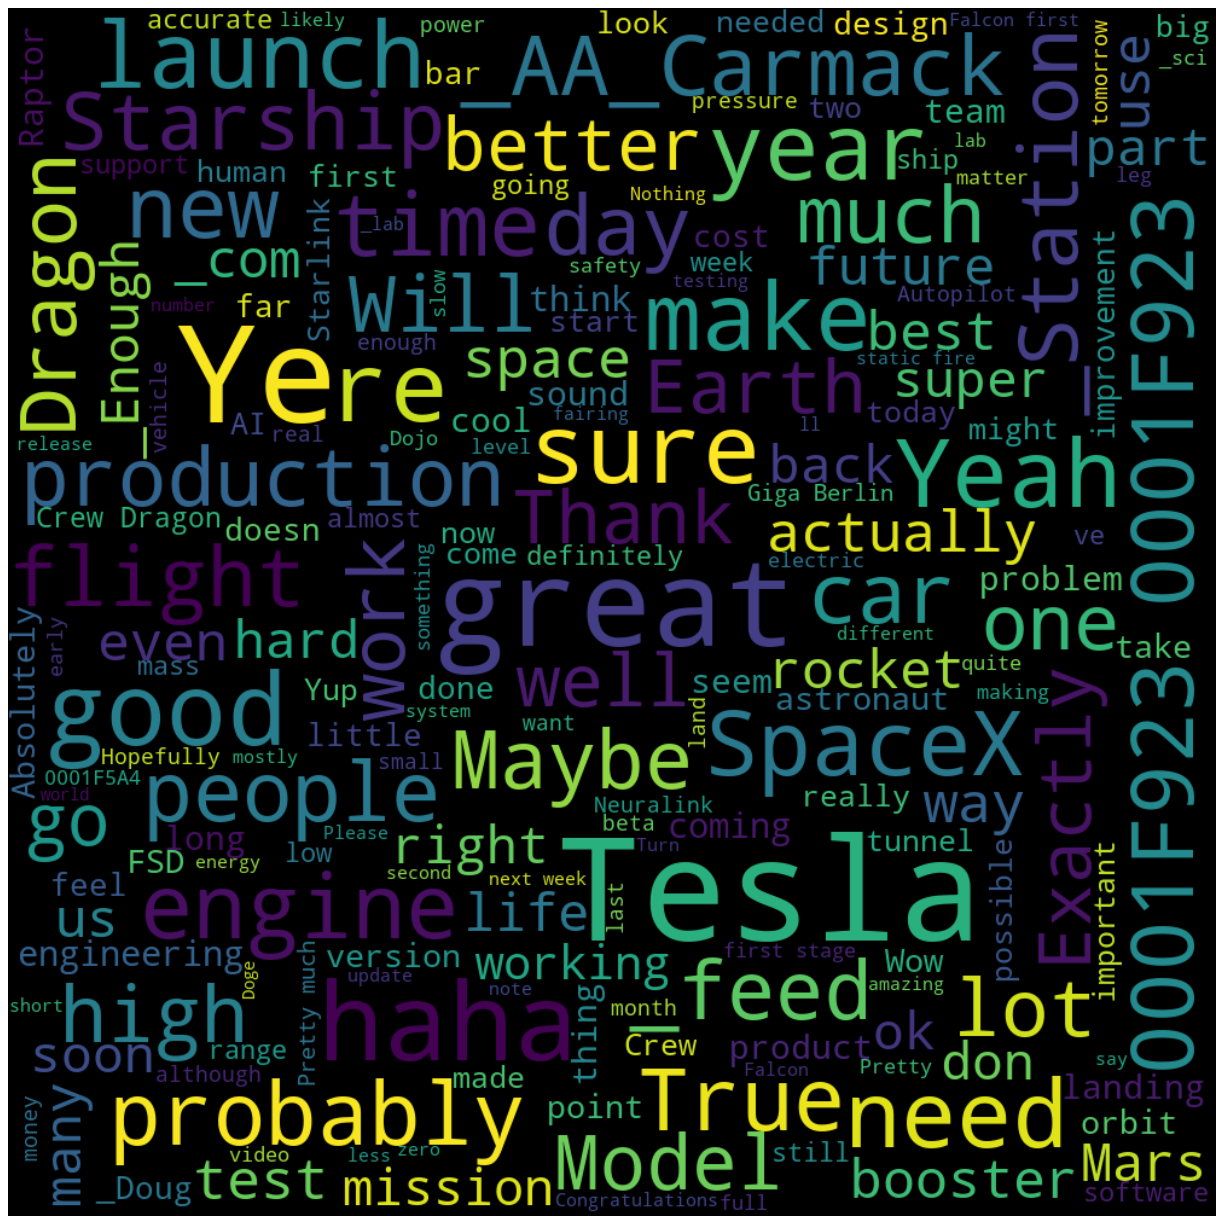

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in df['Text']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

Cataloging the polarity of the tweets


In [39]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    

In [40]:
# Create a New Analysis Column
df["analysis"] = df["polarity"].apply(analysis)
# Print The Data
df

,Text,subjectivity,polarity,analysis
0,Im alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing Cyberpunk HDR next-lev...,0.000000,0.000000,Neutral
2,Great interview!,0.750000,1.000000,Positive
3,Doge underestimated,0.000000,0.000000,Neutral
4,Congratulations Tesla China amazing execution ...,0.366667,0.345313,Positive
...,...,...,...,...
1994,"True, sounds surreal, negative propaganda stil...",0.508333,0.111111,Positive
1995,Make sure read ur terms conditions clicking ac...,0.888889,0.625000,Positive
1996,Samwise Gamgee,0.000000,0.000000,Neutral
1997,Altho Dumb Dumber <U+0001F525><U+0001F525>,0.500000,-0.375000,Negative


In [ ]:
### Displaying the positive and negative tweets

In [41]:
positive_tweets = df[df['analysis'] == 'Positive']
negative_tweets = df[df['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Text'])

positive tweets
 -Great interview!
 -Congratulations Tesla China amazing execution last year. Now next even more!!
 -Happy New Year Ox!
 -_ Haha thanks )
 -The entertaining outcome likely
negative tweets
 -Im alien
 -Frodo underdoge, All thought would fail, Himself all.
 -Your app sucks
 -_ Starlink staggeringly difficult technical economic endeavor. However,
 -_ SpaceX needs pass deep chasm negative cash flow next year




```
# This is formatted as code
```


**Is Elon generally positive or negative?**

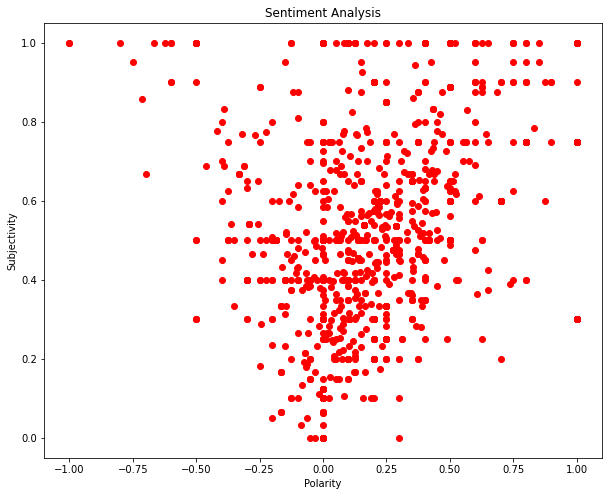

In [42]:
plt.figure(figsize=(10, 8))

for i in range(0, df.shape[0]):
    plt.scatter(df["polarity"][i], df["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [43]:
len(positive_tweets) / len(negative_tweets)


4.217821782178218

Elon mostly do positive tweets compared to negative 